In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Problem Statement:
Classify the water quality whether it is potable or not based on the features provided.


# Read Data

In [20]:
df= pd.read_csv(r"C:\Users\DELL\Downloads\water_potability.csv")

# Initial Analysis

In [21]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


There are 9 Independent features and 1 dependent features. Details for each features are provided in the above top. objective is to use the Potability feature as target feature for classification problem. Let is do more analysis to learn about the dataset better.

### Datatype of the features

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6552 entries, 0 to 6551
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               5570 non-null   float64
 1   Hardness         6552 non-null   float64
 2   Solids           6552 non-null   float64
 3   Chloramines      6552 non-null   float64
 4   Sulfate          4990 non-null   float64
 5   Conductivity     6552 non-null   float64
 6   Organic_carbon   6552 non-null   float64
 7   Trihalomethanes  6228 non-null   float64
 8   Turbidity        6552 non-null   float64
 9   Potability       6552 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 512.0 KB


In [23]:
df.shape

(6552, 10)

Except Target feature, other features are float and continueous value.

In [25]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

### Statistical analysis

In [26]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,5570.000000,7.080795,1.594176,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,6552.000000,196.369496,32.877252,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,6552.000000,22014.092526,8767.901548,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,6552.000000,7.122277,1.582964,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,4990.000000,333.775777,41.412689,129.000000,307.697010,333.073546,359.950968,481.030642
Conductivity,6552.000000,426.205111,80.817895,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,6552.000000,14.284970,3.307909,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,6228.000000,66.396293,16.173710,0.738000,55.835966,66.622485,77.339918,124.000000
Turbidity,6552.000000,3.966786,0.780323,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,6552.000000,0.390110,0.487812,0.000000,0.000000,0.000000,1.000000,1.000000


From the above table, we can see that the count of each feature are not same. so there must me some null values.  
Feature Solids has the high mean and standard deviation comparted to other feature. so the distribution must be high.  
However, the above description is for overall population. lets try the same for 2 samples based on Portability feature

In [27]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2202.000000,7.073783,1.447719,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,2556.000000,195.800744,35.540084,47.432000,174.280566,196.632907,218.062384,323.124000
Solids,2556.000000,22383.991018,9099.229014,728.750830,15668.273620,21199.386615,27977.673210,56488.672410
Chloramines,2556.000000,7.169338,1.702654,0.352000,6.093750,7.215163,8.199318,13.127000
Sulfate,1970.000000,332.566990,47.680706,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,2556.000000,425.383800,82.032388,201.619737,360.932804,420.712729,484.172953,695.369528
Organic_carbon,2556.000000,14.160893,3.263268,2.200000,12.032377,14.162809,16.357375,23.604298
Trihalomethanes,2446.000000,66.539684,16.324080,8.175876,56.002023,66.678214,77.384557,124.000000
Turbidity,2556.000000,3.968328,0.780689,1.492207,3.430167,3.958576,4.510578,6.494249
Potability,2556.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,3368.000000,7.085378,1.683249,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,3996.000000,196.733292,31.053652,98.452931,177.821312,197.123423,216.122144,304.235912
Solids,3996.000000,21777.490788,8541.999501,320.942611,15658.086280,20809.618280,27007.886910,61227.196010
Chloramines,3996.000000,7.092175,1.500857,1.683993,6.155484,7.090334,8.066654,12.653362
Sulfate,3020.000000,334.564290,36.739463,203.444521,311.253565,333.389426,356.870041,460.107069
Conductivity,3996.000000,426.730454,80.037298,181.483754,368.454991,422.229331,480.680392,753.342620
Organic_carbon,3996.000000,14.364335,3.334136,4.371899,12.095251,14.293508,16.651415,28.300000
Trihalomethanes,3782.000000,66.303555,16.077194,0.738000,55.701965,66.542198,77.285822,120.030077
Turbidity,3996.000000,3.965800,0.780185,1.450000,3.443741,3.948076,4.496627,6.739000
Potability,3996.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Mean and std of almost all features are similar for both samples. there are few differnces in Solids feature. Further analysis using hypothetical testing could help us to identify the significance.

### Check for missing values

In [29]:
df.isnull().sum()

ph                  982
Hardness              0
Solids                0
Chloramines           0
Sulfate            1562
Conductivity          0
Organic_carbon        0
Trihalomethanes     324
Turbidity             0
Potability            0
dtype: int64

Features ph, Sulfate and Trihalomethanes are having null values. let us check those in details and find option to ha

In [30]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692710,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601920,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268370,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841820,7.334648,NaN,442.545774,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
6450,6.698154,198.286268,34675.862850,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
6461,6.110022,234.800957,16663.539070,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
6495,6.417716,209.702425,31974.481630,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
6535,9.271355,181.259617,16540.979050,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

In [31]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [32]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Exploratory Data Analysis

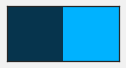

In [33]:
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

Text(0.8, 1500, 'Safe for Human consumption')

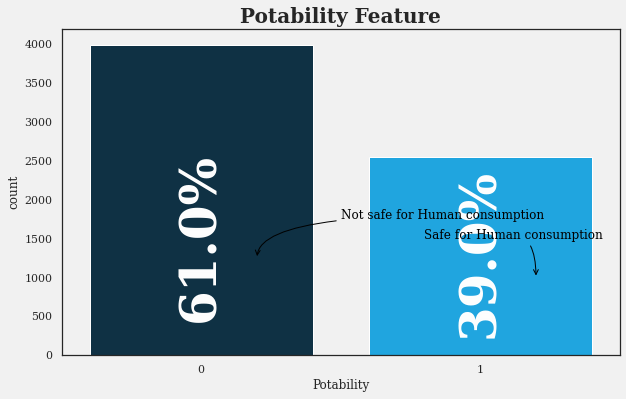

In [34]:
#Lets check the Target features first
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='Potability')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("Potability Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')

There is imbalance in the Target variable. which should be considered for modeling

### Distribution plots

In [35]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


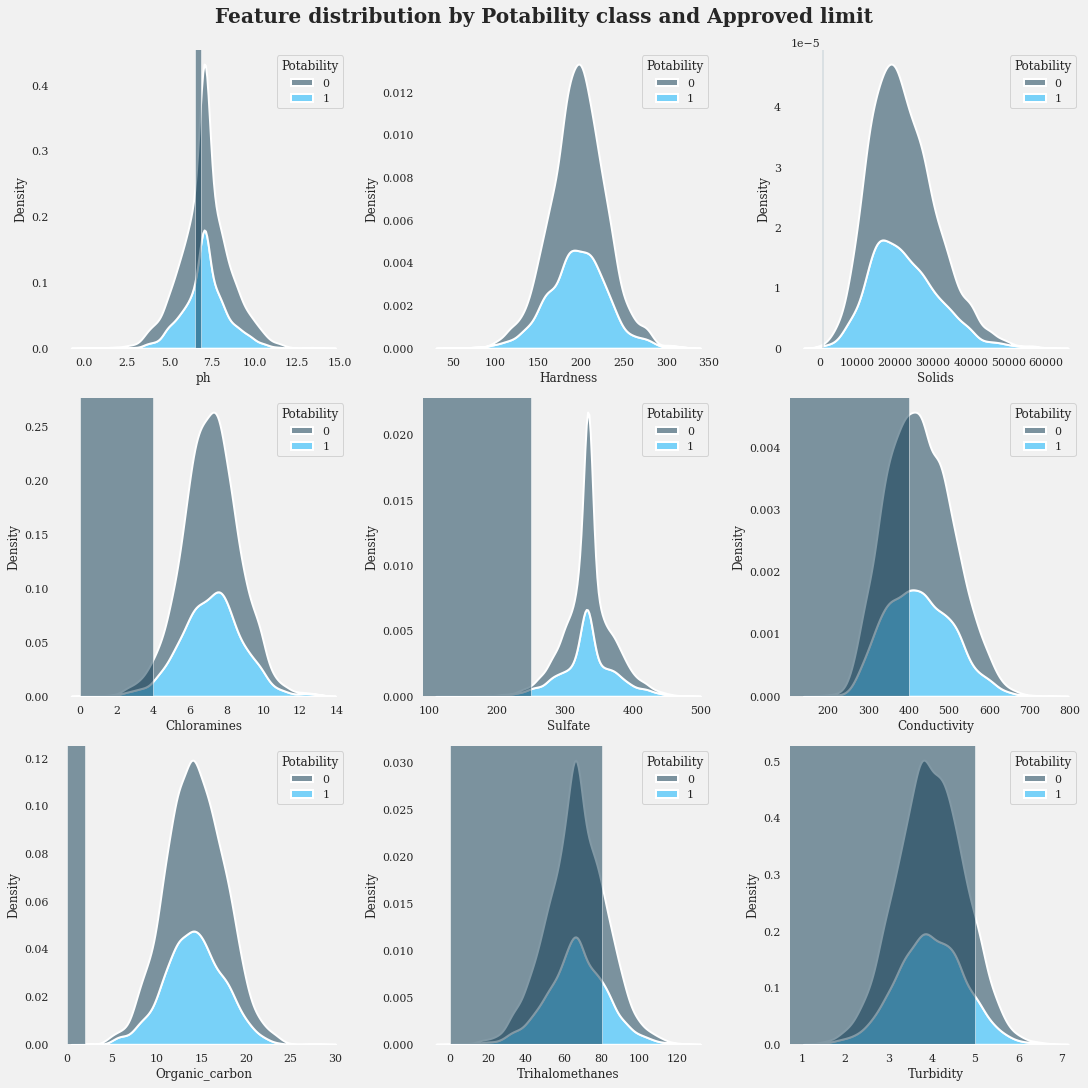

In [36]:
from matplotlib.patches import Rectangle
int_cols =df.columns[:9]
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2)
    l,k = limit.iloc[:,x]
    ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

Based on the approved limit, we can clearly see the difference in the water classification. Ex: distribution of non potable water is high on conductivity compared to potable water. same applicable to Turbidity, Trihalomethanes.  
But, Ph value, Chloramines, Sulfate, Organic carbon presence doesn't show significant difference.

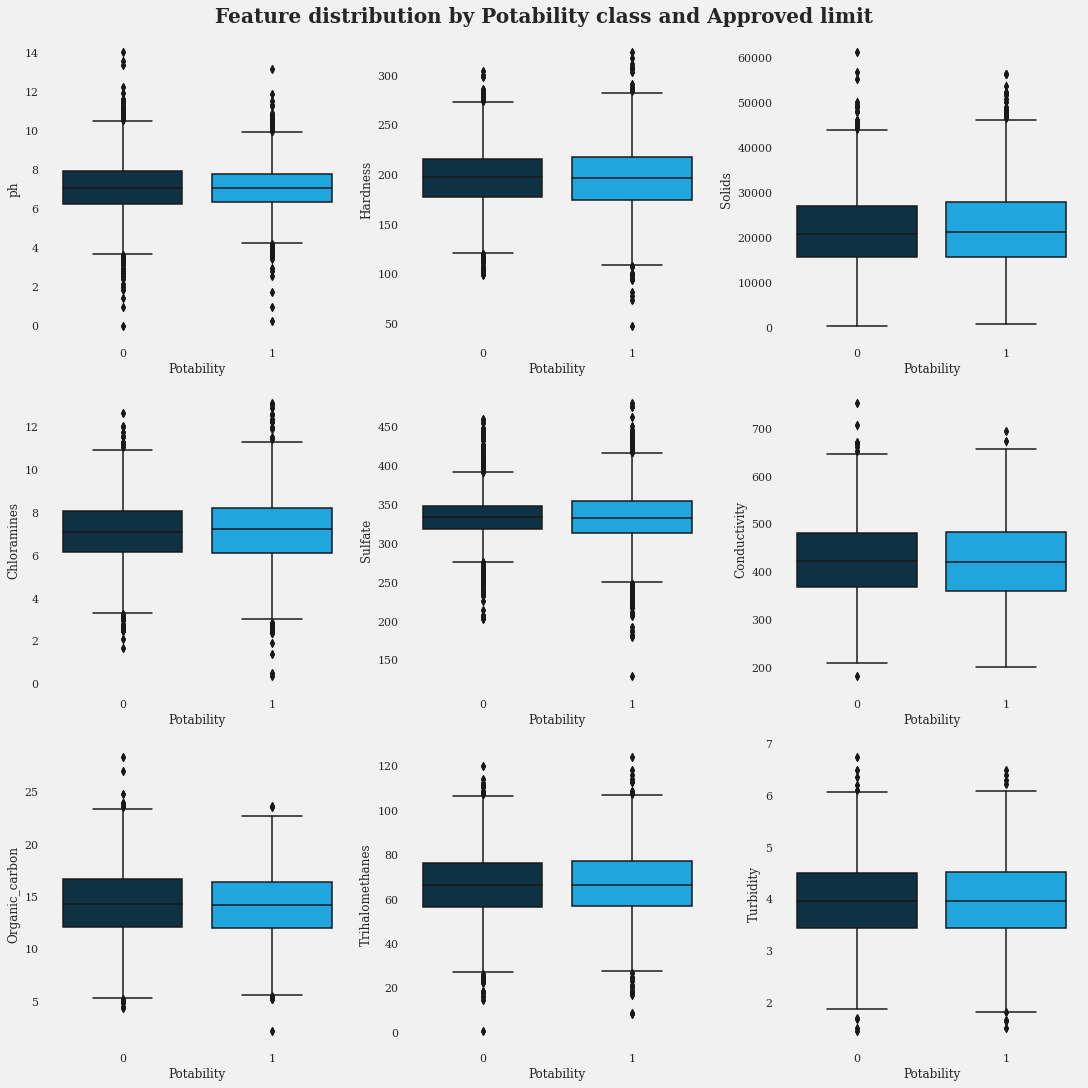

In [37]:
fig, ax= plt.subplots(nrows=3,ncols=3,figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x])
    #l,k = limit.iloc[:,x]
    #ax[x].add_patch(Rectangle(xy=(l,0), width=k-l, height=1, alpha=0.5))
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)

There are outliers in the dataset, we need to handle the same. 
most feature means are looks similar and there are very less differnce in variance. as mentioned in the above observation.

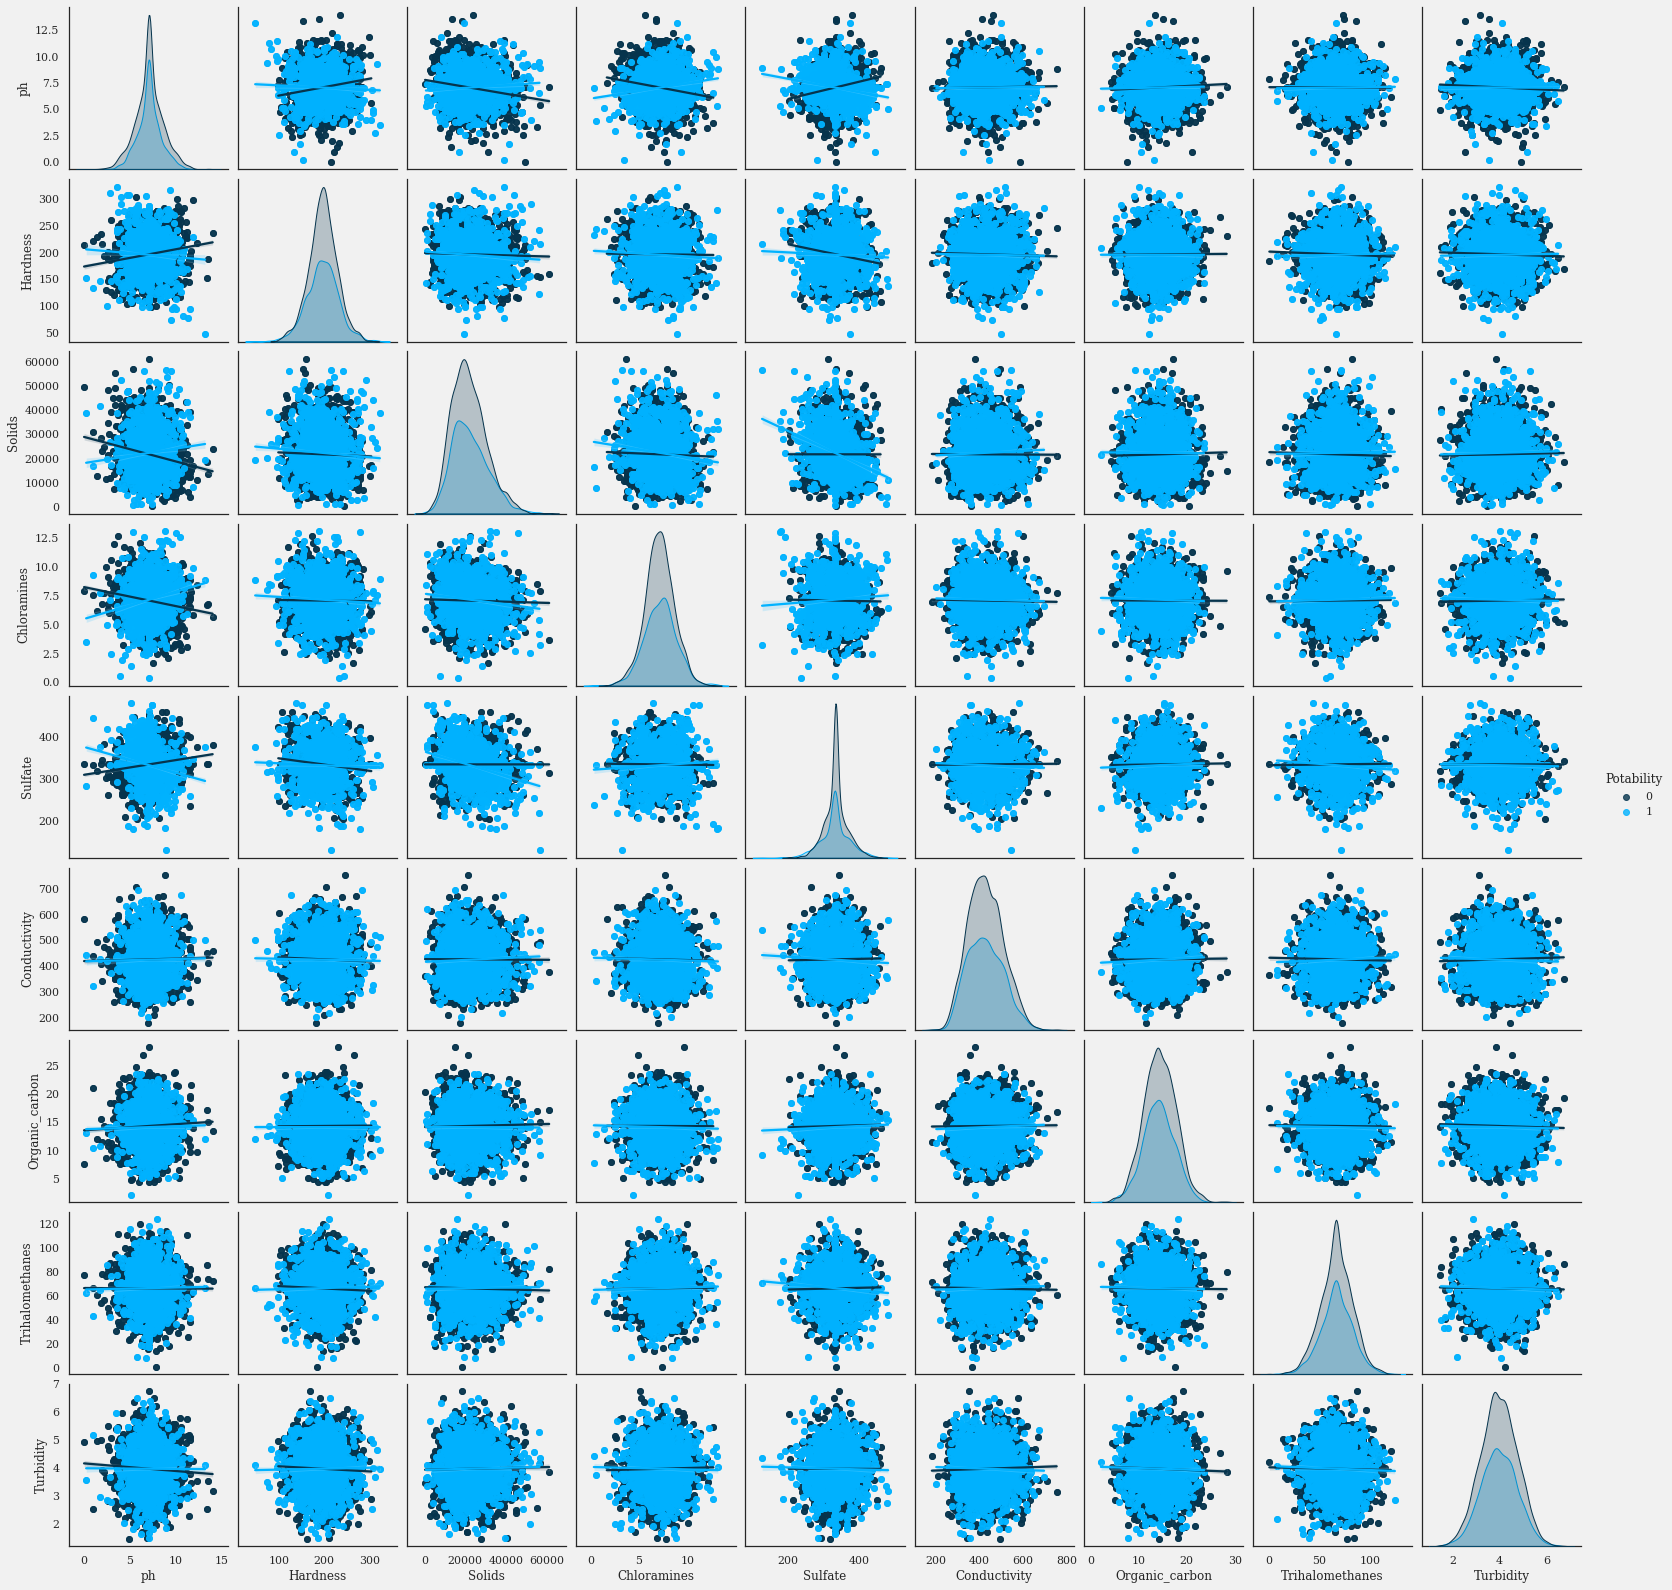

In [38]:
sns.pairplot(df, hue='Potability', kind='reg')

<AxesSubplot:>

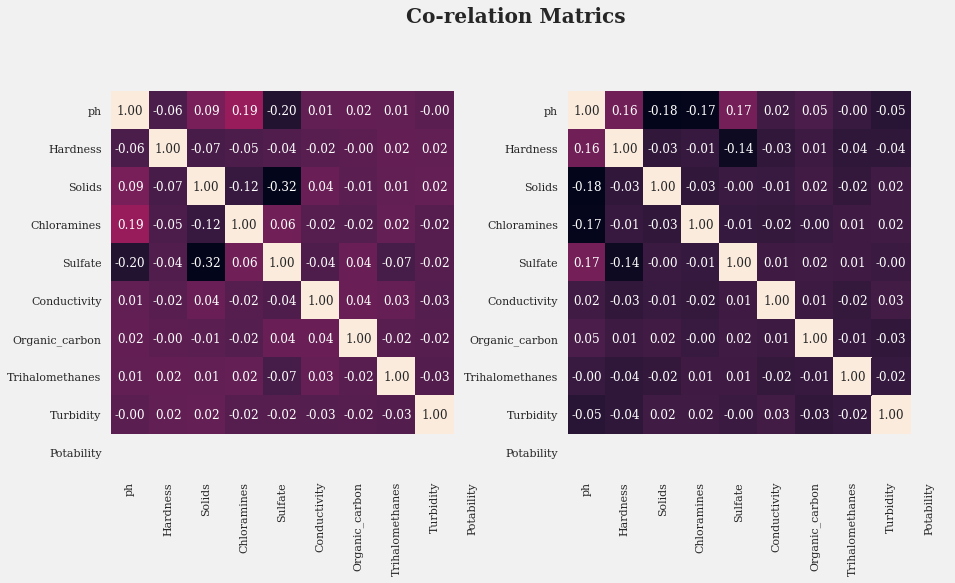

In [39]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<AxesSubplot:>

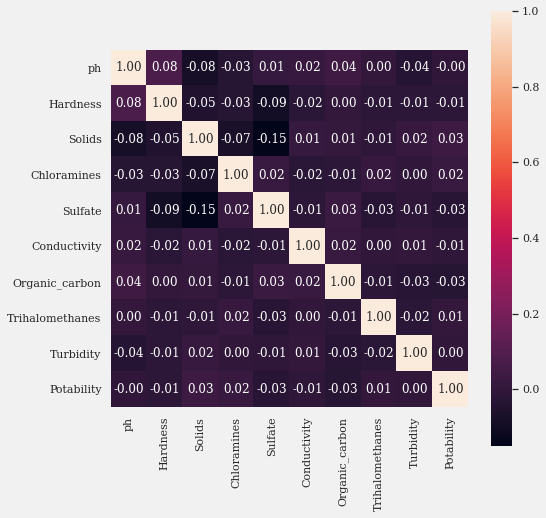

In [22]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

# MODELLING 

In [40]:
df.Potability.value_counts()

0    3996
1    2556
Name: Potability, dtype: int64

In [41]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [42]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, stratify=df.Potability)

In [44]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, stratify=df.Potability)
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']],train[['Potability']])


In [45]:
X_test,y_test=SMOTE().fit_resample(test[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']],test[['Potability']])


In [46]:
X_test.shape

(2398, 9)

In [47]:
y_test.shape

(2398, 1)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1199
           1       0.79      0.82      0.81      1199

    accuracy                           0.80      2398
   macro avg       0.80      0.80      0.80      2398
weighted avg       0.80      0.80      0.80      2398

ACCURACY: 80.19182652210175


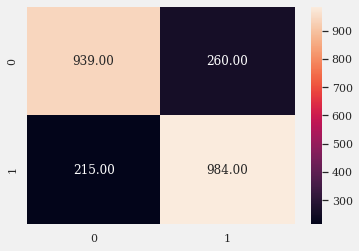

In [48]:

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
gd = GradientBoostingClassifier()
gd.fit(X_resampled, y_resampled)
pred = gd.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print("ACCURACY:",accuracy_score(y_test,pred)*100)

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1199
           1       0.92      0.84      0.88      1199

    accuracy                           0.88      2398
   macro avg       0.88      0.88      0.88      2398
weighted avg       0.88      0.88      0.88      2398

ACCURACY: 88.19849874895746


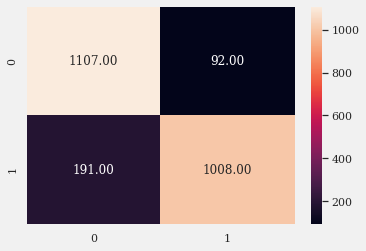

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_resampled, y_resampled)
pred = dtree.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print("ACCURACY:",accuracy_score(y_test,pred)*100)

<ipython-input-55-83bc02506319>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_resampled, y_resampled)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1199
           1       0.94      0.89      0.92      1199

    accuracy                           0.92      2398
   macro avg       0.92      0.92      0.92      2398
weighted avg       0.92      0.92      0.92      2398

ACCURACY: 91.82652210175146


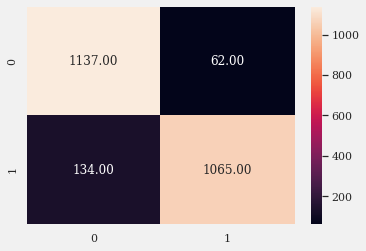

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_resampled, y_resampled)
pred = model2.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')
print("ACCURACY:",accuracy_score(y_test,pred)*100)

In [53]:
#X_test.tail(50)
#y.tail(50)

In [56]:
import pickle
pickle.dump(model2,open('water.pkl','wb'))
data=[4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821]
model=pickle.load(open('water.pkl','rb'))
import numpy as np
arr=np.array(data).reshape(1,-1)
result = model.predict(arr)
print(result)

[1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


We got the prediction as 1 that implies water is safe for consumption